# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coefficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  



Imagine you are trying to fit a linear regression model to predict housing prices. The only probelm is that you have millions of observations and all of your data won't fit in memory.

We learned this morning that linear regression can use the closed-form equation to solve for the coefficients, but how do we solve it when you can't fit all of the data in the matrix?

### Introducing gradient descent



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of the coefficients. The resulting plot of weights and total loss will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />


We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
#alpha - learning step
#m is number of data points to calc cost function
#numepochs - # of times to do this
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
#         print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])
    return costs

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [4]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 50)
m, n = np.shape(x)

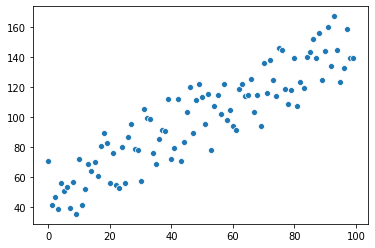

In [5]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 435.946011
Iteration 1 | Cost: 432.403174
Iteration 2 | Cost: 429.061042
Iteration 3 | Cost: 425.907966
Iteration 4 | Cost: 422.932977
Iteration 5 | Cost: 420.125740
Iteration 6 | Cost: 417.476520
Iteration 7 | Cost: 414.976148
Iteration 8 | Cost: 412.615988
Iteration 9 | Cost: 410.387903
Iteration 10 | Cost: 408.284229
Iteration 11 | Cost: 406.297748
Iteration 12 | Cost: 404.421659
Iteration 13 | Cost: 402.649557
Iteration 14 | Cost: 400.975409
Iteration 15 | Cost: 399.393530
Iteration 16 | Cost: 397.898568
Iteration 17 | Cost: 396.485480
Iteration 18 | Cost: 395.149515
Iteration 19 | Cost: 393.886198
Iteration 20 | Cost: 392.691316
Iteration 21 | Cost: 391.560897
Iteration 22 | Cost: 390.491203
Iteration 23 | Cost: 389.478709
Iteration 24 | Cost: 388.520099
Iteration 25 | Cost: 387.612246
Iteration 26 | Cost: 386.752205
Iteration 27 | Cost: 385.937204
Iteration 28 | Cost: 385.164630
Iteration 29 | Cost: 384.432023
Iteration 30 | Cost: 383.737063
Iteration 31 | Cos

Iteration 1453 | Cost: 276.451300
Iteration 1454 | Cost: 276.396636
Iteration 1455 | Cost: 276.341988
Iteration 1456 | Cost: 276.287357
Iteration 1457 | Cost: 276.232743
Iteration 1458 | Cost: 276.178146
Iteration 1459 | Cost: 276.123565
Iteration 1460 | Cost: 276.069001
Iteration 1461 | Cost: 276.014453
Iteration 1462 | Cost: 275.959922
Iteration 1463 | Cost: 275.905407
Iteration 1464 | Cost: 275.850910
Iteration 1465 | Cost: 275.796428
Iteration 1466 | Cost: 275.741964
Iteration 1467 | Cost: 275.687516
Iteration 1468 | Cost: 275.633084
Iteration 1469 | Cost: 275.578669
Iteration 1470 | Cost: 275.524271
Iteration 1471 | Cost: 275.469889
Iteration 1472 | Cost: 275.415524
Iteration 1473 | Cost: 275.361175
Iteration 1474 | Cost: 275.306843
Iteration 1475 | Cost: 275.252527
Iteration 1476 | Cost: 275.198228
Iteration 1477 | Cost: 275.143946
Iteration 1478 | Cost: 275.089680
Iteration 1479 | Cost: 275.035430
Iteration 1480 | Cost: 274.981197
Iteration 1481 | Cost: 274.926981
Iteration 1482

Iteration 2452 | Cost: 229.358331
Iteration 2453 | Cost: 229.318004
Iteration 2454 | Cost: 229.277688
Iteration 2455 | Cost: 229.237385
Iteration 2456 | Cost: 229.197095
Iteration 2457 | Cost: 229.156816
Iteration 2458 | Cost: 229.116550
Iteration 2459 | Cost: 229.076296
Iteration 2460 | Cost: 229.036055
Iteration 2461 | Cost: 228.995825
Iteration 2462 | Cost: 228.955608
Iteration 2463 | Cost: 228.915403
Iteration 2464 | Cost: 228.875210
Iteration 2465 | Cost: 228.835030
Iteration 2466 | Cost: 228.794862
Iteration 2467 | Cost: 228.754706
Iteration 2468 | Cost: 228.714562
Iteration 2469 | Cost: 228.674431
Iteration 2470 | Cost: 228.634311
Iteration 2471 | Cost: 228.594204
Iteration 2472 | Cost: 228.554109
Iteration 2473 | Cost: 228.514027
Iteration 2474 | Cost: 228.473956
Iteration 2475 | Cost: 228.433898
Iteration 2476 | Cost: 228.393852
Iteration 2477 | Cost: 228.353818
Iteration 2478 | Cost: 228.313796
Iteration 2479 | Cost: 228.273787
Iteration 2480 | Cost: 228.233789
Iteration 2481

Iteration 3482 | Cost: 193.698172
Iteration 3483 | Cost: 193.668700
Iteration 3484 | Cost: 193.639238
Iteration 3485 | Cost: 193.609784
Iteration 3486 | Cost: 193.580340
Iteration 3487 | Cost: 193.550904
Iteration 3488 | Cost: 193.521477
Iteration 3489 | Cost: 193.492060
Iteration 3490 | Cost: 193.462651
Iteration 3491 | Cost: 193.433251
Iteration 3492 | Cost: 193.403860
Iteration 3493 | Cost: 193.374479
Iteration 3494 | Cost: 193.345106
Iteration 3495 | Cost: 193.315742
Iteration 3496 | Cost: 193.286387
Iteration 3497 | Cost: 193.257040
Iteration 3498 | Cost: 193.227703
Iteration 3499 | Cost: 193.198375
Iteration 3500 | Cost: 193.169056
Iteration 3501 | Cost: 193.139745
Iteration 3502 | Cost: 193.110444
Iteration 3503 | Cost: 193.081151
Iteration 3504 | Cost: 193.051868
Iteration 3505 | Cost: 193.022593
Iteration 3506 | Cost: 192.993327
Iteration 3507 | Cost: 192.964070
Iteration 3508 | Cost: 192.934822
Iteration 3509 | Cost: 192.905583
Iteration 3510 | Cost: 192.876353
Iteration 3511

Iteration 4451 | Cost: 168.963896
Iteration 4452 | Cost: 168.941954
Iteration 4453 | Cost: 168.920020
Iteration 4454 | Cost: 168.898091
Iteration 4455 | Cost: 168.876170
Iteration 4456 | Cost: 168.854255
Iteration 4457 | Cost: 168.832347
Iteration 4458 | Cost: 168.810445
Iteration 4459 | Cost: 168.788550
Iteration 4460 | Cost: 168.766662
Iteration 4461 | Cost: 168.744780
Iteration 4462 | Cost: 168.722905
Iteration 4463 | Cost: 168.701037
Iteration 4464 | Cost: 168.679176
Iteration 4465 | Cost: 168.657321
Iteration 4466 | Cost: 168.635472
Iteration 4467 | Cost: 168.613631
Iteration 4468 | Cost: 168.591796
Iteration 4469 | Cost: 168.569967
Iteration 4470 | Cost: 168.548146
Iteration 4471 | Cost: 168.526331
Iteration 4472 | Cost: 168.504522
Iteration 4473 | Cost: 168.482720
Iteration 4474 | Cost: 168.460925
Iteration 4475 | Cost: 168.439137
Iteration 4476 | Cost: 168.417355
Iteration 4477 | Cost: 168.395580
Iteration 4478 | Cost: 168.373811
Iteration 4479 | Cost: 168.352049
Iteration 4480

Iteration 5451 | Cost: 150.045045
Iteration 5452 | Cost: 150.028863
Iteration 5453 | Cost: 150.012685
Iteration 5454 | Cost: 149.996513
Iteration 5455 | Cost: 149.980346
Iteration 5456 | Cost: 149.964183
Iteration 5457 | Cost: 149.948026
Iteration 5458 | Cost: 149.931873
Iteration 5459 | Cost: 149.915725
Iteration 5460 | Cost: 149.899583
Iteration 5461 | Cost: 149.883445
Iteration 5462 | Cost: 149.867312
Iteration 5463 | Cost: 149.851184
Iteration 5464 | Cost: 149.835061
Iteration 5465 | Cost: 149.818942
Iteration 5466 | Cost: 149.802829
Iteration 5467 | Cost: 149.786721
Iteration 5468 | Cost: 149.770617
Iteration 5469 | Cost: 149.754519
Iteration 5470 | Cost: 149.738425
Iteration 5471 | Cost: 149.722336
Iteration 5472 | Cost: 149.706252
Iteration 5473 | Cost: 149.690173
Iteration 5474 | Cost: 149.674099
Iteration 5475 | Cost: 149.658030
Iteration 5476 | Cost: 149.641966
Iteration 5477 | Cost: 149.625906
Iteration 5478 | Cost: 149.609852
Iteration 5479 | Cost: 149.593802
Iteration 5480

Iteration 6450 | Cost: 136.104154
Iteration 6451 | Cost: 136.092216
Iteration 6452 | Cost: 136.080282
Iteration 6453 | Cost: 136.068351
Iteration 6454 | Cost: 136.056423
Iteration 6455 | Cost: 136.044500
Iteration 6456 | Cost: 136.032580
Iteration 6457 | Cost: 136.020664
Iteration 6458 | Cost: 136.008751
Iteration 6459 | Cost: 135.996842
Iteration 6460 | Cost: 135.984936
Iteration 6461 | Cost: 135.973035
Iteration 6462 | Cost: 135.961136
Iteration 6463 | Cost: 135.949242
Iteration 6464 | Cost: 135.937351
Iteration 6465 | Cost: 135.925463
Iteration 6466 | Cost: 135.913580
Iteration 6467 | Cost: 135.901700
Iteration 6468 | Cost: 135.889823
Iteration 6469 | Cost: 135.877950
Iteration 6470 | Cost: 135.866081
Iteration 6471 | Cost: 135.854215
Iteration 6472 | Cost: 135.842353
Iteration 6473 | Cost: 135.830495
Iteration 6474 | Cost: 135.818640
Iteration 6475 | Cost: 135.806789
Iteration 6476 | Cost: 135.794941
Iteration 6477 | Cost: 135.783097
Iteration 6478 | Cost: 135.771257
Iteration 6479

Iteration 7396 | Cost: 126.290124
Iteration 7397 | Cost: 126.281174
Iteration 7398 | Cost: 126.272226
Iteration 7399 | Cost: 126.263281
Iteration 7400 | Cost: 126.254339
Iteration 7401 | Cost: 126.245399
Iteration 7402 | Cost: 126.236463
Iteration 7403 | Cost: 126.227528
Iteration 7404 | Cost: 126.218597
Iteration 7405 | Cost: 126.209668
Iteration 7406 | Cost: 126.200742
Iteration 7407 | Cost: 126.191819
Iteration 7408 | Cost: 126.182899
Iteration 7409 | Cost: 126.173981
Iteration 7410 | Cost: 126.165066
Iteration 7411 | Cost: 126.156154
Iteration 7412 | Cost: 126.147244
Iteration 7413 | Cost: 126.138337
Iteration 7414 | Cost: 126.129433
Iteration 7415 | Cost: 126.120531
Iteration 7416 | Cost: 126.111632
Iteration 7417 | Cost: 126.102736
Iteration 7418 | Cost: 126.093843
Iteration 7419 | Cost: 126.084952
Iteration 7420 | Cost: 126.076064
Iteration 7421 | Cost: 126.067179
Iteration 7422 | Cost: 126.058296
Iteration 7423 | Cost: 126.049417
Iteration 7424 | Cost: 126.040539
Iteration 7425

Iteration 8116 | Cost: 120.502396
Iteration 8117 | Cost: 120.495208
Iteration 8118 | Cost: 120.488021
Iteration 8119 | Cost: 120.480837
Iteration 8120 | Cost: 120.473655
Iteration 8121 | Cost: 120.466476
Iteration 8122 | Cost: 120.459298
Iteration 8123 | Cost: 120.452123
Iteration 8124 | Cost: 120.444950
Iteration 8125 | Cost: 120.437779
Iteration 8126 | Cost: 120.430610
Iteration 8127 | Cost: 120.423443
Iteration 8128 | Cost: 120.416279
Iteration 8129 | Cost: 120.409117
Iteration 8130 | Cost: 120.401956
Iteration 8131 | Cost: 120.394799
Iteration 8132 | Cost: 120.387643
Iteration 8133 | Cost: 120.380489
Iteration 8134 | Cost: 120.373338
Iteration 8135 | Cost: 120.366189
Iteration 8136 | Cost: 120.359042
Iteration 8137 | Cost: 120.351897
Iteration 8138 | Cost: 120.344754
Iteration 8139 | Cost: 120.337614
Iteration 8140 | Cost: 120.330476
Iteration 8141 | Cost: 120.323339
Iteration 8142 | Cost: 120.316205
Iteration 8143 | Cost: 120.309074
Iteration 8144 | Cost: 120.301944
Iteration 8145

Iteration 9043 | Cost: 114.695645
Iteration 9044 | Cost: 114.690224
Iteration 9045 | Cost: 114.684805
Iteration 9046 | Cost: 114.679388
Iteration 9047 | Cost: 114.673972
Iteration 9048 | Cost: 114.668558
Iteration 9049 | Cost: 114.663145
Iteration 9050 | Cost: 114.657735
Iteration 9051 | Cost: 114.652325
Iteration 9052 | Cost: 114.646918
Iteration 9053 | Cost: 114.641512
Iteration 9054 | Cost: 114.636108
Iteration 9055 | Cost: 114.630705
Iteration 9056 | Cost: 114.625304
Iteration 9057 | Cost: 114.619905
Iteration 9058 | Cost: 114.614507
Iteration 9059 | Cost: 114.609111
Iteration 9060 | Cost: 114.603717
Iteration 9061 | Cost: 114.598324
Iteration 9062 | Cost: 114.592933
Iteration 9063 | Cost: 114.587544
Iteration 9064 | Cost: 114.582156
Iteration 9065 | Cost: 114.576770
Iteration 9066 | Cost: 114.571385
Iteration 9067 | Cost: 114.566002
Iteration 9068 | Cost: 114.560621
Iteration 9069 | Cost: 114.555241
Iteration 9070 | Cost: 114.549863
Iteration 9071 | Cost: 114.544487
Iteration 9072

Iteration 9919 | Cost: 110.526990
Iteration 9920 | Cost: 110.522839
Iteration 9921 | Cost: 110.518688
Iteration 9922 | Cost: 110.514539
Iteration 9923 | Cost: 110.510391
Iteration 9924 | Cost: 110.506245
Iteration 9925 | Cost: 110.502099
Iteration 9926 | Cost: 110.497955
Iteration 9927 | Cost: 110.493812
Iteration 9928 | Cost: 110.489671
Iteration 9929 | Cost: 110.485531
Iteration 9930 | Cost: 110.481392
Iteration 9931 | Cost: 110.477254
Iteration 9932 | Cost: 110.473117
Iteration 9933 | Cost: 110.468982
Iteration 9934 | Cost: 110.464848
Iteration 9935 | Cost: 110.460715
Iteration 9936 | Cost: 110.456584
Iteration 9937 | Cost: 110.452454
Iteration 9938 | Cost: 110.448325
Iteration 9939 | Cost: 110.444197
Iteration 9940 | Cost: 110.440070
Iteration 9941 | Cost: 110.435945
Iteration 9942 | Cost: 110.431821
Iteration 9943 | Cost: 110.427699
Iteration 9944 | Cost: 110.423577
Iteration 9945 | Cost: 110.419457
Iteration 9946 | Cost: 110.415338
Iteration 9947 | Cost: 110.411220
Iteration 9948

Iteration 10382 | Cost: 108.733842
Iteration 10383 | Cost: 108.730237
Iteration 10384 | Cost: 108.726632
Iteration 10385 | Cost: 108.723028
Iteration 10386 | Cost: 108.719426
Iteration 10387 | Cost: 108.715824
Iteration 10388 | Cost: 108.712224
Iteration 10389 | Cost: 108.708625
Iteration 10390 | Cost: 108.705027
Iteration 10391 | Cost: 108.701430
Iteration 10392 | Cost: 108.697834
Iteration 10393 | Cost: 108.694239
Iteration 10394 | Cost: 108.690646
Iteration 10395 | Cost: 108.687053
Iteration 10396 | Cost: 108.683461
Iteration 10397 | Cost: 108.679871
Iteration 10398 | Cost: 108.676282
Iteration 10399 | Cost: 108.672693
Iteration 10400 | Cost: 108.669106
Iteration 10401 | Cost: 108.665520
Iteration 10402 | Cost: 108.661935
Iteration 10403 | Cost: 108.658351
Iteration 10404 | Cost: 108.654769
Iteration 10405 | Cost: 108.651187
Iteration 10406 | Cost: 108.647606
Iteration 10407 | Cost: 108.644027
Iteration 10408 | Cost: 108.640448
Iteration 10409 | Cost: 108.636871
Iteration 10410 | Co

Iteration 11447 | Cost: 105.453640
Iteration 11448 | Cost: 105.451033
Iteration 11449 | Cost: 105.448426
Iteration 11450 | Cost: 105.445821
Iteration 11451 | Cost: 105.443216
Iteration 11452 | Cost: 105.440612
Iteration 11453 | Cost: 105.438009
Iteration 11454 | Cost: 105.435406
Iteration 11455 | Cost: 105.432805
Iteration 11456 | Cost: 105.430204
Iteration 11457 | Cost: 105.427604
Iteration 11458 | Cost: 105.425005
Iteration 11459 | Cost: 105.422406
Iteration 11460 | Cost: 105.419809
Iteration 11461 | Cost: 105.417212
Iteration 11462 | Cost: 105.414616
Iteration 11463 | Cost: 105.412020
Iteration 11464 | Cost: 105.409426
Iteration 11465 | Cost: 105.406832
Iteration 11466 | Cost: 105.404239
Iteration 11467 | Cost: 105.401647
Iteration 11468 | Cost: 105.399056
Iteration 11469 | Cost: 105.396465
Iteration 11470 | Cost: 105.393875
Iteration 11471 | Cost: 105.391286
Iteration 11472 | Cost: 105.388698
Iteration 11473 | Cost: 105.386111
Iteration 11474 | Cost: 105.383524
Iteration 11475 | Co

Iteration 12447 | Cost: 103.205641
Iteration 12448 | Cost: 103.203718
Iteration 12449 | Cost: 103.201796
Iteration 12450 | Cost: 103.199874
Iteration 12451 | Cost: 103.197953
Iteration 12452 | Cost: 103.196032
Iteration 12453 | Cost: 103.194113
Iteration 12454 | Cost: 103.192193
Iteration 12455 | Cost: 103.190274
Iteration 12456 | Cost: 103.188356
Iteration 12457 | Cost: 103.186439
Iteration 12458 | Cost: 103.184522
Iteration 12459 | Cost: 103.182605
Iteration 12460 | Cost: 103.180690
Iteration 12461 | Cost: 103.178774
Iteration 12462 | Cost: 103.176860
Iteration 12463 | Cost: 103.174946
Iteration 12464 | Cost: 103.173032
Iteration 12465 | Cost: 103.171119
Iteration 12466 | Cost: 103.169207
Iteration 12467 | Cost: 103.167295
Iteration 12468 | Cost: 103.165384
Iteration 12469 | Cost: 103.163474
Iteration 12470 | Cost: 103.161564
Iteration 12471 | Cost: 103.159654
Iteration 12472 | Cost: 103.157745
Iteration 12473 | Cost: 103.155837
Iteration 12474 | Cost: 103.153930
Iteration 12475 | Co

Iteration 13315 | Cost: 101.738750
Iteration 13316 | Cost: 101.737274
Iteration 13317 | Cost: 101.735798
Iteration 13318 | Cost: 101.734323
Iteration 13319 | Cost: 101.732848
Iteration 13320 | Cost: 101.731374
Iteration 13321 | Cost: 101.729900
Iteration 13322 | Cost: 101.728426
Iteration 13323 | Cost: 101.726953
Iteration 13324 | Cost: 101.725480
Iteration 13325 | Cost: 101.724008
Iteration 13326 | Cost: 101.722536
Iteration 13327 | Cost: 101.721065
Iteration 13328 | Cost: 101.719594
Iteration 13329 | Cost: 101.718124
Iteration 13330 | Cost: 101.716654
Iteration 13331 | Cost: 101.715184
Iteration 13332 | Cost: 101.713715
Iteration 13333 | Cost: 101.712246
Iteration 13334 | Cost: 101.710778
Iteration 13335 | Cost: 101.709311
Iteration 13336 | Cost: 101.707843
Iteration 13337 | Cost: 101.706376
Iteration 13338 | Cost: 101.704910
Iteration 13339 | Cost: 101.703444
Iteration 13340 | Cost: 101.701979
Iteration 13341 | Cost: 101.700514
Iteration 13342 | Cost: 101.699049
Iteration 13343 | Co

Iteration 14159 | Cost: 100.639844
Iteration 14160 | Cost: 100.638703
Iteration 14161 | Cost: 100.637561
Iteration 14162 | Cost: 100.636420
Iteration 14163 | Cost: 100.635280
Iteration 14164 | Cost: 100.634139
Iteration 14165 | Cost: 100.632999
Iteration 14166 | Cost: 100.631860
Iteration 14167 | Cost: 100.630720
Iteration 14168 | Cost: 100.629582
Iteration 14169 | Cost: 100.628443
Iteration 14170 | Cost: 100.627305
Iteration 14171 | Cost: 100.626167
Iteration 14172 | Cost: 100.625029
Iteration 14173 | Cost: 100.623892
Iteration 14174 | Cost: 100.622755
Iteration 14175 | Cost: 100.621619
Iteration 14176 | Cost: 100.620483
Iteration 14177 | Cost: 100.619347
Iteration 14178 | Cost: 100.618211
Iteration 14179 | Cost: 100.617076
Iteration 14180 | Cost: 100.615941
Iteration 14181 | Cost: 100.614807
Iteration 14182 | Cost: 100.613673
Iteration 14183 | Cost: 100.612539
Iteration 14184 | Cost: 100.611406
Iteration 14185 | Cost: 100.610273
Iteration 14186 | Cost: 100.609140
Iteration 14187 | Co

Iteration 14945 | Cost: 99.841643
Iteration 14946 | Cost: 99.840744
Iteration 14947 | Cost: 99.839845
Iteration 14948 | Cost: 99.838947
Iteration 14949 | Cost: 99.838049
Iteration 14950 | Cost: 99.837152
Iteration 14951 | Cost: 99.836254
Iteration 14952 | Cost: 99.835357
Iteration 14953 | Cost: 99.834461
Iteration 14954 | Cost: 99.833564
Iteration 14955 | Cost: 99.832668
Iteration 14956 | Cost: 99.831772
Iteration 14957 | Cost: 99.830876
Iteration 14958 | Cost: 99.829981
Iteration 14959 | Cost: 99.829086
Iteration 14960 | Cost: 99.828191
Iteration 14961 | Cost: 99.827296
Iteration 14962 | Cost: 99.826402
Iteration 14963 | Cost: 99.825508
Iteration 14964 | Cost: 99.824614
Iteration 14965 | Cost: 99.823720
Iteration 14966 | Cost: 99.822827
Iteration 14967 | Cost: 99.821934
Iteration 14968 | Cost: 99.821041
Iteration 14969 | Cost: 99.820149
Iteration 14970 | Cost: 99.819257
Iteration 14971 | Cost: 99.818365
Iteration 14972 | Cost: 99.817473
Iteration 14973 | Cost: 99.816582
Iteration 1497

Iteration 15825 | Cost: 99.147761
Iteration 15826 | Cost: 99.147073
Iteration 15827 | Cost: 99.146386
Iteration 15828 | Cost: 99.145699
Iteration 15829 | Cost: 99.145012
Iteration 15830 | Cost: 99.144325
Iteration 15831 | Cost: 99.143639
Iteration 15832 | Cost: 99.142953
Iteration 15833 | Cost: 99.142267
Iteration 15834 | Cost: 99.141581
Iteration 15835 | Cost: 99.140895
Iteration 15836 | Cost: 99.140210
Iteration 15837 | Cost: 99.139525
Iteration 15838 | Cost: 99.138840
Iteration 15839 | Cost: 99.138155
Iteration 15840 | Cost: 99.137471
Iteration 15841 | Cost: 99.136786
Iteration 15842 | Cost: 99.136102
Iteration 15843 | Cost: 99.135418
Iteration 15844 | Cost: 99.134734
Iteration 15845 | Cost: 99.134051
Iteration 15846 | Cost: 99.133368
Iteration 15847 | Cost: 99.132685
Iteration 15848 | Cost: 99.132002
Iteration 15849 | Cost: 99.131319
Iteration 15850 | Cost: 99.130637
Iteration 15851 | Cost: 99.129954
Iteration 15852 | Cost: 99.129272
Iteration 15853 | Cost: 99.128590
Iteration 1585

Iteration 16225 | Cost: 98.888818
Iteration 16226 | Cost: 98.888209
Iteration 16227 | Cost: 98.887601
Iteration 16228 | Cost: 98.886992
Iteration 16229 | Cost: 98.886384
Iteration 16230 | Cost: 98.885776
Iteration 16231 | Cost: 98.885169
Iteration 16232 | Cost: 98.884561
Iteration 16233 | Cost: 98.883954
Iteration 16234 | Cost: 98.883347
Iteration 16235 | Cost: 98.882740
Iteration 16236 | Cost: 98.882133
Iteration 16237 | Cost: 98.881526
Iteration 16238 | Cost: 98.880920
Iteration 16239 | Cost: 98.880314
Iteration 16240 | Cost: 98.879708
Iteration 16241 | Cost: 98.879102
Iteration 16242 | Cost: 98.878496
Iteration 16243 | Cost: 98.877891
Iteration 16244 | Cost: 98.877285
Iteration 16245 | Cost: 98.876680
Iteration 16246 | Cost: 98.876075
Iteration 16247 | Cost: 98.875470
Iteration 16248 | Cost: 98.874866
Iteration 16249 | Cost: 98.874261
Iteration 16250 | Cost: 98.873657
Iteration 16251 | Cost: 98.873053
Iteration 16252 | Cost: 98.872449
Iteration 16253 | Cost: 98.871846
Iteration 1625

Iteration 16775 | Cost: 98.580545
Iteration 16776 | Cost: 98.580030
Iteration 16777 | Cost: 98.579515
Iteration 16778 | Cost: 98.579001
Iteration 16779 | Cost: 98.578487
Iteration 16780 | Cost: 98.577972
Iteration 16781 | Cost: 98.577458
Iteration 16782 | Cost: 98.576945
Iteration 16783 | Cost: 98.576431
Iteration 16784 | Cost: 98.575917
Iteration 16785 | Cost: 98.575404
Iteration 16786 | Cost: 98.574891
Iteration 16787 | Cost: 98.574378
Iteration 16788 | Cost: 98.573865
Iteration 16789 | Cost: 98.573352
Iteration 16790 | Cost: 98.572839
Iteration 16791 | Cost: 98.572327
Iteration 16792 | Cost: 98.571815
Iteration 16793 | Cost: 98.571302
Iteration 16794 | Cost: 98.570791
Iteration 16795 | Cost: 98.570279
Iteration 16796 | Cost: 98.569767
Iteration 16797 | Cost: 98.569256
Iteration 16798 | Cost: 98.568744
Iteration 16799 | Cost: 98.568233
Iteration 16800 | Cost: 98.567722
Iteration 16801 | Cost: 98.567211
Iteration 16802 | Cost: 98.566700
Iteration 16803 | Cost: 98.566190
Iteration 1680

Iteration 17530 | Cost: 98.233260
Iteration 17531 | Cost: 98.232851
Iteration 17532 | Cost: 98.232442
Iteration 17533 | Cost: 98.232033
Iteration 17534 | Cost: 98.231624
Iteration 17535 | Cost: 98.231215
Iteration 17536 | Cost: 98.230807
Iteration 17537 | Cost: 98.230399
Iteration 17538 | Cost: 98.229991
Iteration 17539 | Cost: 98.229582
Iteration 17540 | Cost: 98.229174
Iteration 17541 | Cost: 98.228767
Iteration 17542 | Cost: 98.228359
Iteration 17543 | Cost: 98.227951
Iteration 17544 | Cost: 98.227544
Iteration 17545 | Cost: 98.227137
Iteration 17546 | Cost: 98.226729
Iteration 17547 | Cost: 98.226322
Iteration 17548 | Cost: 98.225915
Iteration 17549 | Cost: 98.225508
Iteration 17550 | Cost: 98.225102
Iteration 17551 | Cost: 98.224695
Iteration 17552 | Cost: 98.224289
Iteration 17553 | Cost: 98.223882
Iteration 17554 | Cost: 98.223476
Iteration 17555 | Cost: 98.223070
Iteration 17556 | Cost: 98.222664
Iteration 17557 | Cost: 98.222258
Iteration 17558 | Cost: 98.221853
Iteration 1755

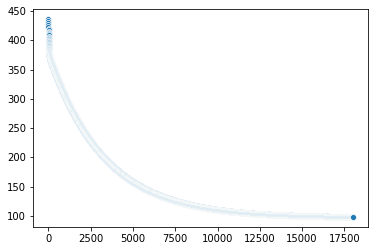

In [6]:
#theta is equal to beta 
#18000 times to train
numEpochs= 18000
alpha = 0.0006
theta = np.array([1.9059518,1.534264])
costs = gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=500/>

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise